<a href="https://colab.research.google.com/github/210111006/INTERN-TASK-2-PYTHON-/blob/main/CropYield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('yield_df.csv')

In [69]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [70]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [71]:
df.shape

(28242, 7)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [73]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [74]:
df.duplicated().sum()

2310

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [77]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [78]:
df = df.drop(to_drop)

In [79]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [80]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [81]:
len(df['Area'].unique())

101

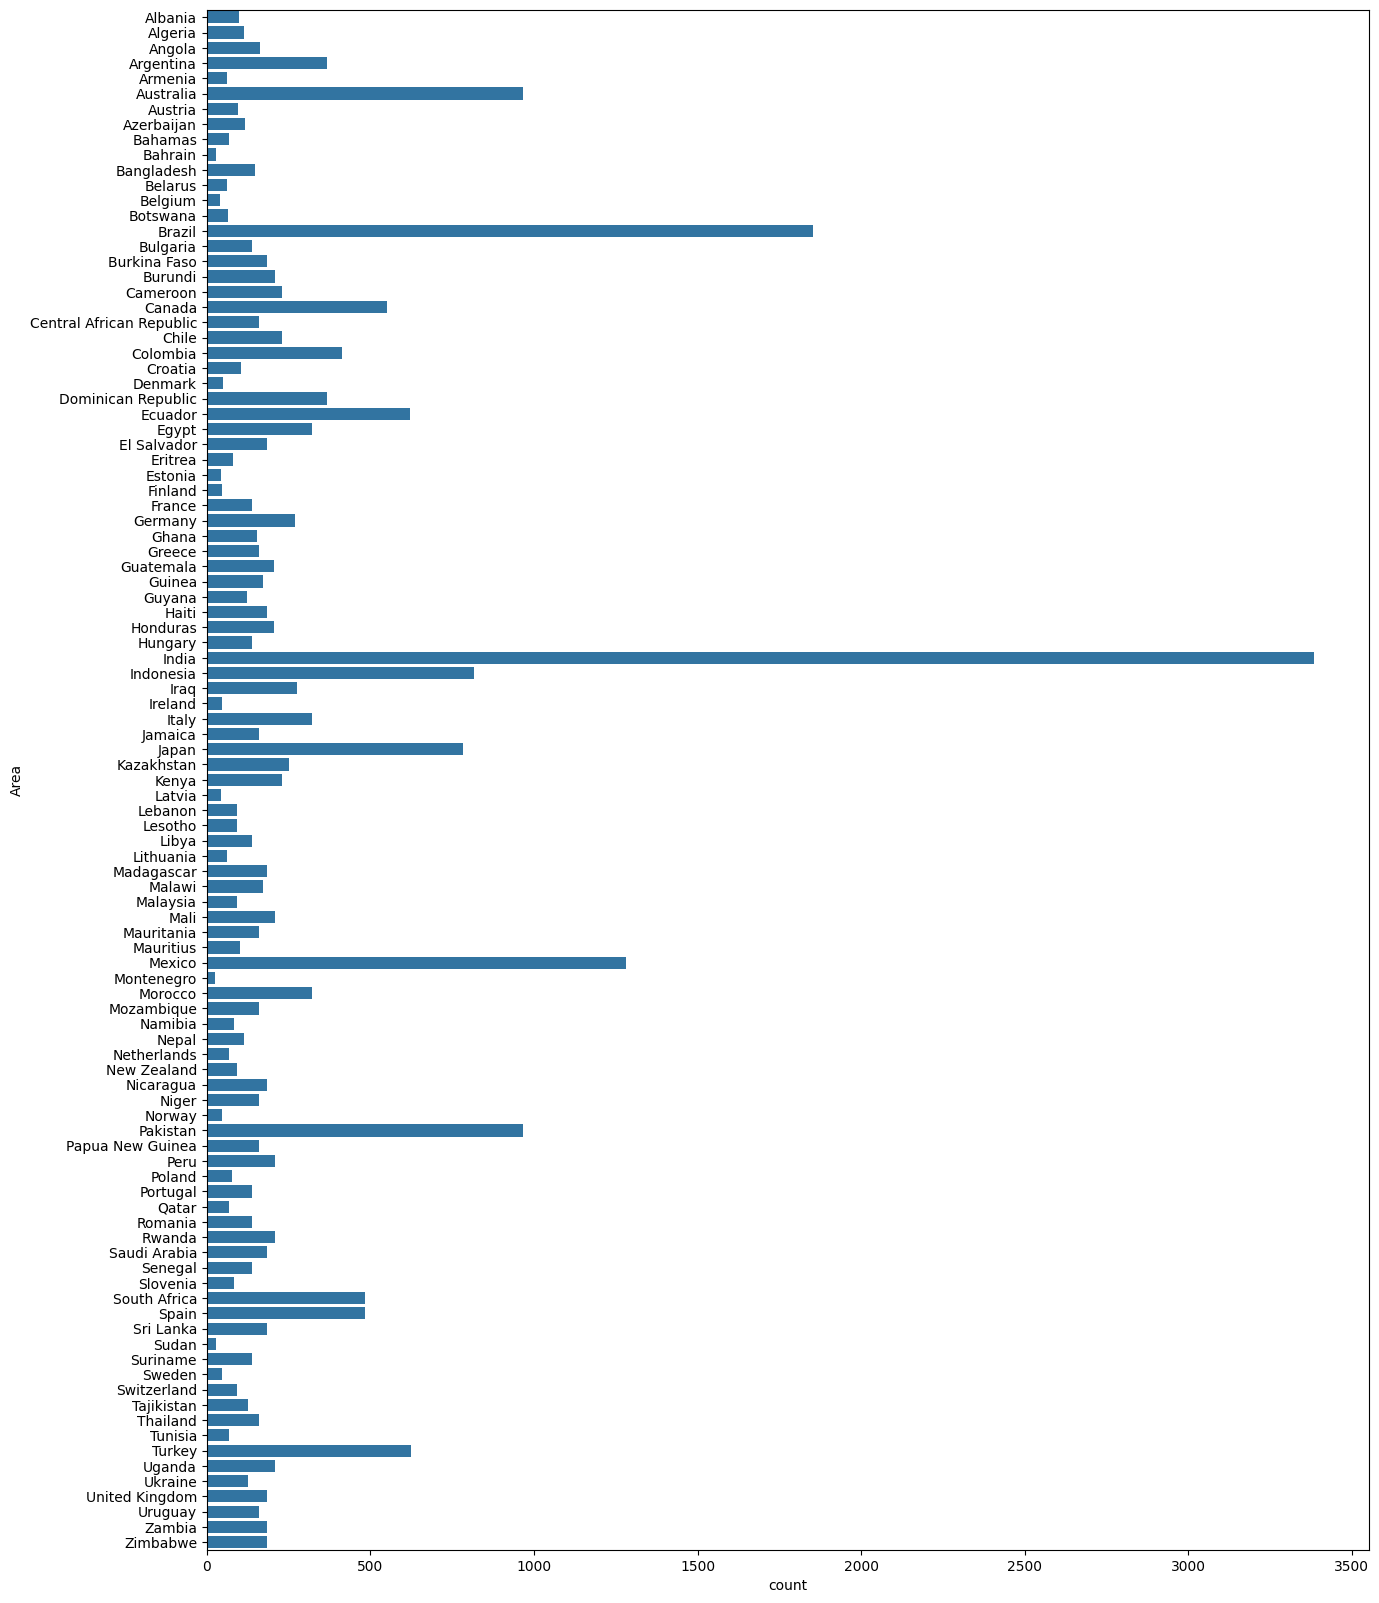

In [82]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [83]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [84]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [85]:
df['hg/ha_yield'].sum()

1996196943

In [86]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

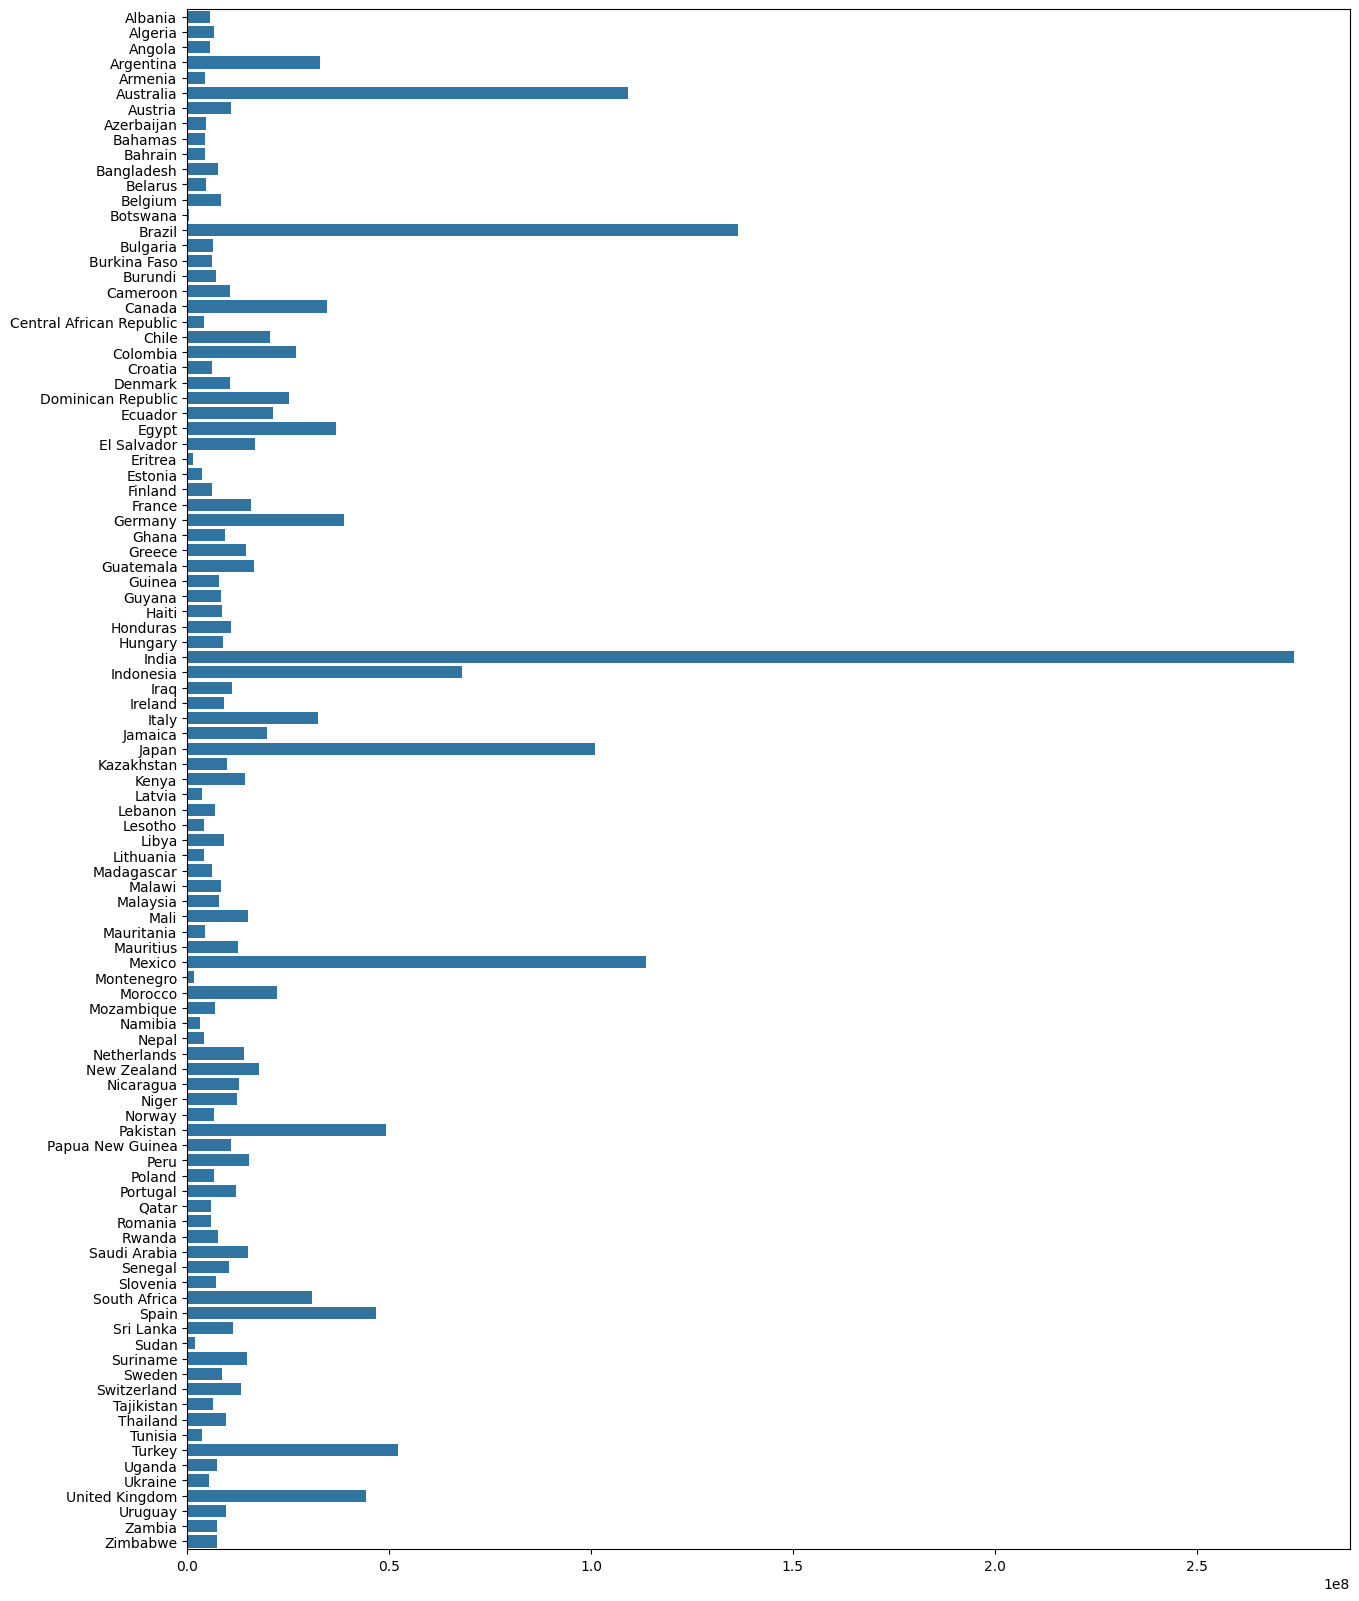

In [87]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<AxesSubplot:xlabel='count', ylabel='Item'>

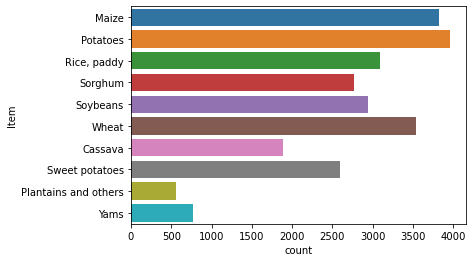

In [ ]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [88]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

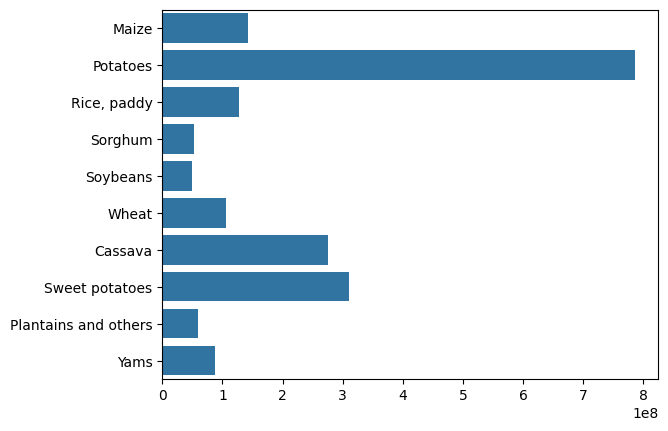

In [89]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [90]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [91]:
 df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [94]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [95]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Let's train our model

In [96]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.491754632363 score : 0.747312327961836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.88758307408 score : 0.7473042337448462
Dtr : mae : 3918.9984576826682 score : 0.9799300017989767


# Select model

In [97]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23359., 34879., 77391.])

# Predictive System

In [98]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [99]:
result

array([36613.])

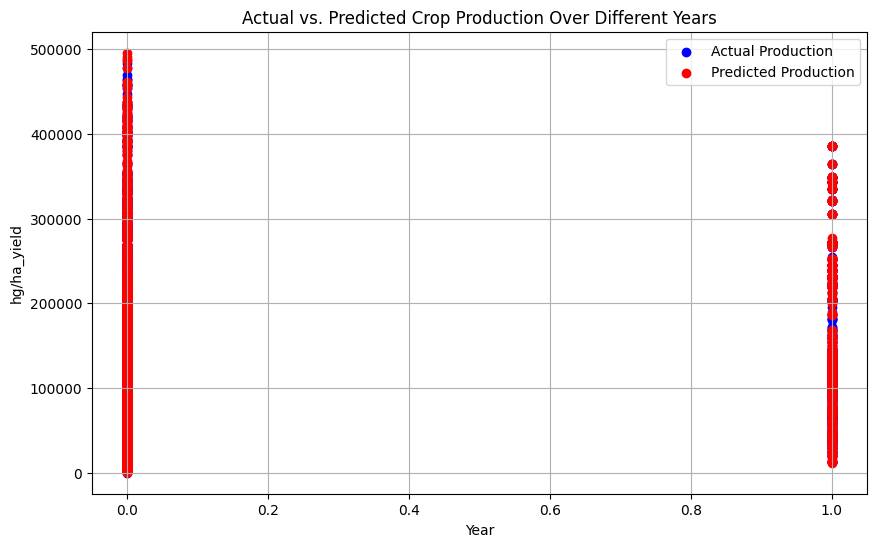

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
df = pd.read_csv('yield_df.csv')  # Update with your file path

# Prepare the features and target
X = df[['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

# Encode categorical variable 'Item' instead of 'country'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Drop the 'Item' column after encoding
X_encoded = X_encoded[:, :-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predict crop production for the test set
predictions = dtr.predict(X_test)

# Visualize the variation in crop production over different years
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Production')
plt.scatter(X_test[:, 0], predictions, color='red', label='Predicted Production')
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.title('Actual vs. Predicted Crop Production Over Different Years')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


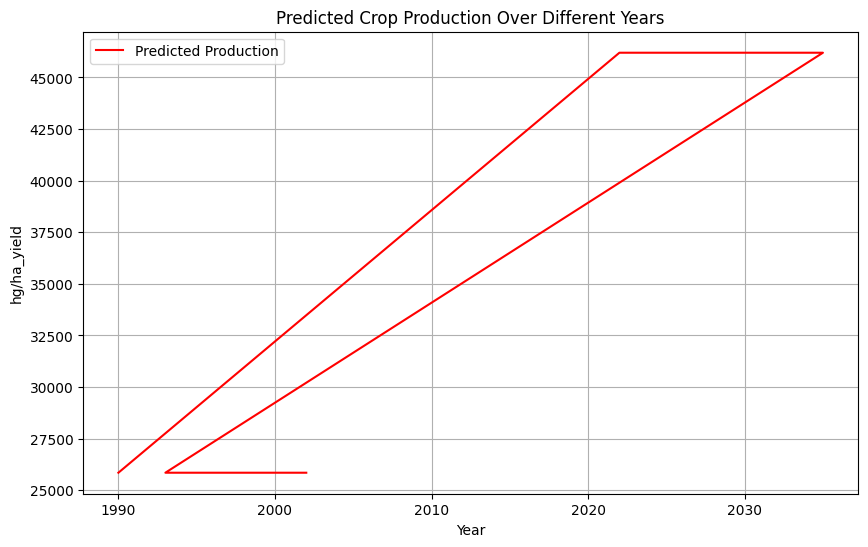

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
df = pd.read_csv('yield_df.csv')  # Update with your file path

# Prepare the features and target
X = df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

# Encode categorical variables 'Area' and 'Item'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4, 5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

def prediction(Years, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item] for year in Years], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = ct.transform(features)

    # Make the prediction
    predicted_yields = dtr.predict(transformed_features)

    return predicted_yields

# Example inputs
Years = [1990, 2022, 2035, 1993, 2002]  # Multiple years
average_rain_fall_mm_per_year = 1875.00
pesticides_tonnes = 121.00
avg_temp = 45.67
Area = 'Albania'
Item = 'Maize'

# Get predictions for the range of years
results = prediction(Years, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

# Visualize the variation in crop production over different years
plt.figure(figsize=(10, 6))
plt.plot(Years, results, color='red', label='Predicted Production')
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.title('Predicted Crop Production Over Different Years')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


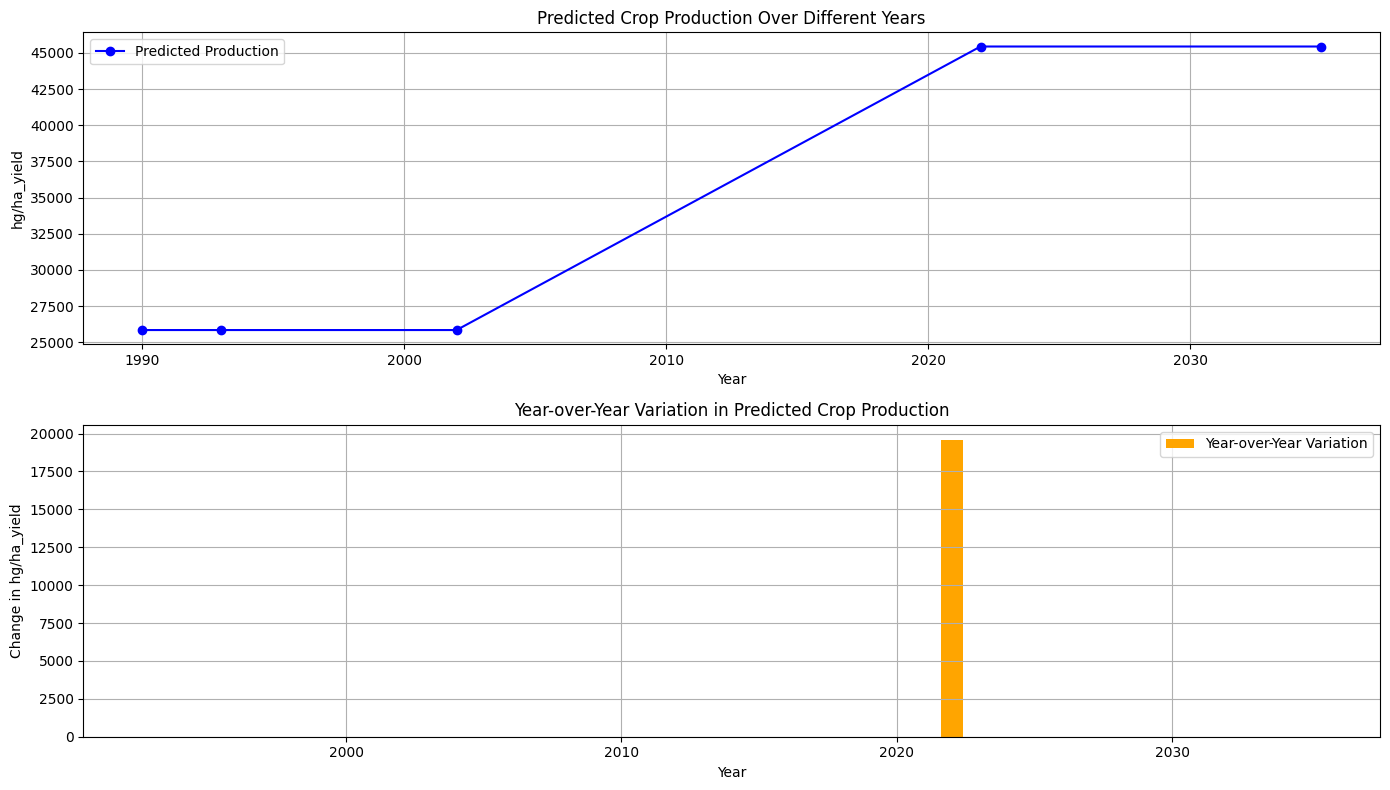

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset
df = pd.read_csv('yield_df.csv')  # Update with your file path

# Prepare the features and target
X = df[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

# Encode categorical variables 'Area' and 'Item'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4, 5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

def prediction(Years, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item] for year in Years], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = ct.transform(features)

    # Make the prediction
    predicted_yields = dtr.predict(transformed_features)

    return predicted_yields

# Example inputs
Years = [1990, 1993, 2002, 2022, 2035]  # Multiple years
average_rain_fall_mm_per_year = 1875.00
pesticides_tonnes = 121.00
avg_temp = 45.67
Area = 'Albania'
Item = 'Maize'

# Get predictions for the range of years
results = prediction(Years, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

# Calculate year-over-year variations
variations = np.diff(results)

# Visualize the predicted crop production over different years
plt.figure(figsize=(14, 8))

# Plot predicted production as a line plot
plt.subplot(2, 1, 1)
plt.plot(Years, results, marker='o', linestyle='-', color='blue', label='Predicted Production')
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.title('Predicted Crop Production Over Different Years')
plt.legend()
plt.grid(True)

# Plot variations as a bar plot
plt.subplot(2, 1, 2)
plt.bar(Years[1:], variations, color='orange', label='Year-over-Year Variation')
plt.xlabel('Year')
plt.ylabel('Change in hg/ha_yield')
plt.title('Year-over-Year Variation in Predicted Crop Production')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
